In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [4]:
titanic_data=pd.read_csv('Downloads/tested.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
titanic_data.shape

(418, 12)

In [6]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [7]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [8]:
titanic_data=titanic_data.drop(columns='Cabin',axis=1)

In [9]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [10]:
titanic_data['Age'].fillna(titanic_data['Age'].mean(),inplace=True)

In [12]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.50000,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.00000,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.00000,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,30.27259,0,0,A.5. 3236,8.0500,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.00000,0,0,PC 17758,108.9000,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,0,3,"Ware, Mr. Frederick",male,30.27259,0,0,359309,8.0500,S


In [11]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [13]:
titanic_data['Fare'].fillna(titanic_data['Fare'].mean(),inplace=True)

In [14]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [15]:
titanic_data['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

In [16]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,12.634534,0.896760,0.981429,55.840500
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,30.272590,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,35.750000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [17]:
sns.set()

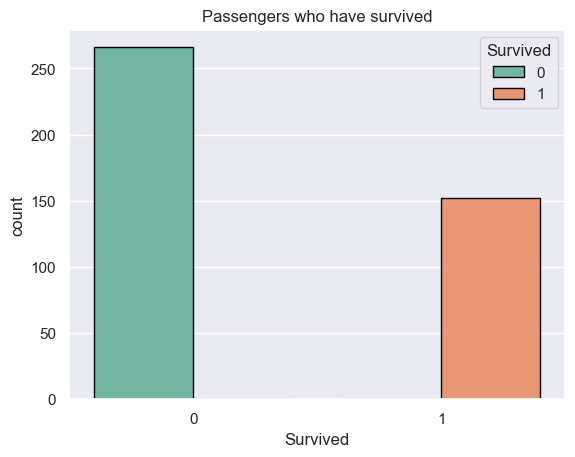

In [21]:
sns.countplot(x ='Survived',hue = 'Survived',data=titanic_data, edgecolor="black", palette="Set2").set_title('Passengers who have survived')
plt.show()

In [19]:
titanic_data['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

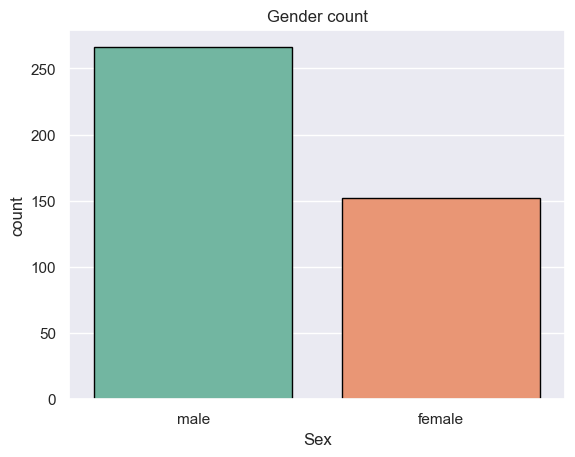

In [20]:
sns.countplot(x="Sex",data=titanic_data ,edgecolor="black", palette="Set2").set_title("Gender count")
plt.show()

In [22]:
titanic_data['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [23]:
titanic_data.replace({'Sex':{'male':1,'female':2},'Embarked':{'S':1,'C':2,'Q':3}},inplace=True)

In [24]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,3
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",2,47.0,1,0,363272,7.0000,1
2,894,0,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,3
3,895,0,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,1
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",2,22.0,1,1,3101298,12.2875,1


In [25]:
A = titanic_data.drop(columns = ['PassengerId', 'Name', 'Ticket', 'Survived'], axis = 1)
B = titanic_data['Survived']
A

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.50000,0,0,7.8292,3
1,3,2,47.00000,1,0,7.0000,1
2,2,1,62.00000,0,0,9.6875,3
3,3,1,27.00000,0,0,8.6625,1
4,3,2,22.00000,1,1,12.2875,1
...,...,...,...,...,...,...,...
413,3,1,30.27259,0,0,8.0500,1
414,1,2,39.00000,0,0,108.9000,2
415,3,1,38.50000,0,0,7.2500,1
416,3,1,30.27259,0,0,8.0500,1


In [27]:
print(B)

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64


In [29]:
A_train, A_test, B_train, B_test = train_test_split(A,B, test_size = 0.2, random_state = 2)

In [30]:
print(A.shape, A_train.shape, A_test.shape)

(418, 7) (334, 7) (84, 7)


In [33]:
titanic_data = pd.get_dummies(A, columns=['Sex'], drop_first=True)

model = LogisticRegression(random_state = 0)


model.fit(A_train, B_train)

LogisticRegression(random_state=0)

In [35]:
A_train_prediction = model.predict(A_train)

In [36]:
print(A_train_prediction)

[1 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 1 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 0
 1 1 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 1 0 0
 0 0 1 1 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 1 0 0 0 0 1 0 1 1
 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 1 0 0 1 0 0
 1 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1
 0 1 1 1 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 1 1
 1]


In [42]:
print(B_train)

280    1
284    1
40     0
17     0
362    1
      ..
299    0
22     1
72     1
15     1
168    1
Name: Survived, Length: 334, dtype: int64


In [37]:
training_data_accuracy = accuracy_score(B_train, A_train_prediction)
print('Accuracy score of training data = ', training_data_accuracy)

Accuracy score of training data =  1.0


In [38]:
A_test_prediction = model.predict(A_test)
print(A_test_prediction)

[0 0 0 1 1 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 1
 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0
 0 1 1 0 1 0 0 0 0 0]


In [43]:
print(B_test)

146    0
223    0
193    0
305    1
188    1
      ..
348    0
30     0
174    0
68     0
204    0
Name: Survived, Length: 84, dtype: int64


In [39]:
testing_data_accuracy = accuracy_score(B_test, A_test_prediction)
print('Accuracy score of training data = ', testing_data_accuracy)

Accuracy score of training data =  1.0


In [45]:
A_test_prediction = model.predict(A_test)

# Calculating the survival rate
survival_rate = A_test_prediction.mean()

if survival_rate < 1:
    print("Congratulations! You survived.")
else:
    print("I'm sorry, but you have failed to survive.")

Congratulations! You survived.
